In [1]:
# importing necessary libraries and configurations
import matplotlib.pyplot as plt
import pandas as pd

from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

%matplotlib inline
plt.style.use("seaborn-white")

In [2]:
# loading the data set
df = pd.read_csv("Datasets/df_01.csv")

In [3]:
# data cleaning and indexing
drop = ["zip_code", "latitude", "longitude"]
df.drop(drop, axis=1, inplace=True)
df.occurred_date_time = df.occurred_date_time.astype("datetime64")
df.set_index(["occurred_date_time"], inplace=True)
df.sort_index(inplace=True)

# examining the new dataframe
display(df.shape)
display(df.head())
display(df.tail())

(168082, 15)

highest_offense_description family_violence  \
occurred_date_time                                                
2003-01-01 00:00:00              IDENTITY THEFT               N   
2003-01-01 00:08:00         ASSAULT WITH INJURY               N   
2003-01-01 00:11:00         PUBLIC INTOXICATION               N   
2003-01-01 00:11:00  POSS OF DRUG PARAPHERNALIA               N   
2003-01-01 00:15:00             PURSE SNATCHING               N   

                        report_date_time                 location_type  \
occurred_date_time                                                       
2003-01-01 00:00:00  2005-02-14 17:30:00  COMMERCIAL / OFFICE BUILDING   
2003-01-01 00:08:00  2003-01-01 00:08:00              BAR / NIGHT CLUB   
2003-01-01 00:11:00  2003-01-01 00:11:00  STREETS / HWY / ROAD / ALLEY   
2003-01-01 00:11:00  2003-01-01 00:11:00  STREETS / HWY / ROAD / ALLEY   
2003-01-01 00:15:00  2003-01-02 16:53:00  STREETS / HWY / ROAD / ALLEY   

                                          address  council_district  \
occurred_date_time                                                    
2003-01-01 00:00:00                  715 E 8TH ST               9.0   
2003-01-01 00:08:00               404 COLORADO ST               9.0   
2003-01-01 00:11:00    500 BLOCK SAN JACINTO BLVD               9.0   
2003-01-01 00:11:00  700 BLOCK E 6TH OLD PECAN ST               NaN   
2003-01-01 00:15:00                  100 W 4TH ST               9.0   

                    apd_sector  apd_district clearance_status  \
occurred_date_time                                              
2003-01-01 00:00:00         GE           2.0              NaN   
2003-01-01 00:08:00         GE           1.0                N   
2003-01-01 00:11:00         GE           2.0                C   
2003-01-01 00:11:00         GE           3.0                N   
2003-01-01 00:15:00         GE           1.0                N   

                          clearance_date  year  month  week  day  hour  
occurred_date_time                                                      
2003-01-01 00:00:00                  NaN  2003      1     1    1     0  
2003-01-01 00:08:00                  NaN  2003      1     1    1     0  
2003-01-01 00:11:00                  NaN  2003      1     1    1     0  
2003-01-01 00:11:00  2003-01-06 00:00:00  2003      1     1    1     0  
2003-01-01 00:15:00                  NaN  2003      1     1    1     0

highest_offense_description family_violence  \
occurred_date_time                                                
2020-12-18 19:14:00                       THEFT               N   
2020-12-18 22:27:00          FAMILY DISTURBANCE               N   
2020-12-19 01:38:00              DEADLY CONDUCT               N   
2020-12-19 07:30:00         BURGLARY OF VEHICLE               N   
2020-12-19 15:46:00          FAMILY DISTURBANCE               N   

                        report_date_time                 location_type  \
occurred_date_time                                                       
2020-12-18 19:14:00  2020-12-19 13:12:00  COMMERCIAL / OFFICE BUILDING   
2020-12-18 22:27:00  2020-12-18 22:27:00              RESIDENCE / HOME   
2020-12-19 01:38:00  2020-12-19 01:38:00         PARKING LOTS / GARAGE   
2020-12-19 07:30:00  2020-12-19 16:40:00          HOTEL / MOTEL / ETC.   
2020-12-19 15:46:00  2020-12-19 15:46:00          HOTEL / MOTEL / ETC.   

                                              address  council_district  \
occurred_date_time                                                        
2020-12-18 19:14:00  503 W MARTIN LUTHER KING JR BLVD               9.0   
2020-12-18 22:27:00                     507 SABINE ST               9.0   
2020-12-19 01:38:00                      91 RAINEY ST               9.0   
2020-12-19 07:30:00                78 N IH 35 SVRD SB               9.0   
2020-12-19 15:46:00              200 SAN JACINTO BLVD               9.0   

                    apd_sector  apd_district clearance_status clearance_date  \
occurred_date_time                                                             
2020-12-18 19:14:00         BA           2.0              NaN            NaN   
2020-12-18 22:27:00         GE           2.0              NaN            NaN   
2020-12-19 01:38:00         GE           3.0              NaN            NaN   
2020-12-19 07:30:00         GE           3.0              NaN            NaN   
2020-12-19 15:46:00         GE           3.0              NaN            NaN   

                     year  month  week  day  hour  
occurred_date_time                                 
2020-12-18 19:14:00  2020     12    51   18    19  
2020-12-18 22:27:00  2020     12    51   18    22  
2020-12-19 01:38:00  2020     12    51   19     1  
2020-12-19 07:30:00  2020     12    51   19     7  
2020-12-19 15:46:00  2020     12    51   19    15

In [4]:
# Creating violent crime and murder data frames for analysis
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')

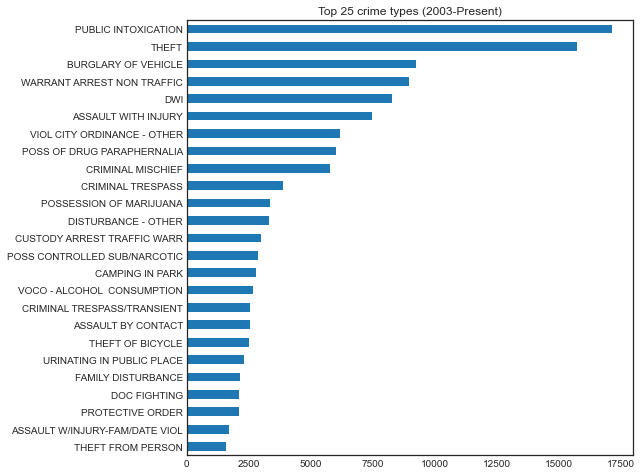

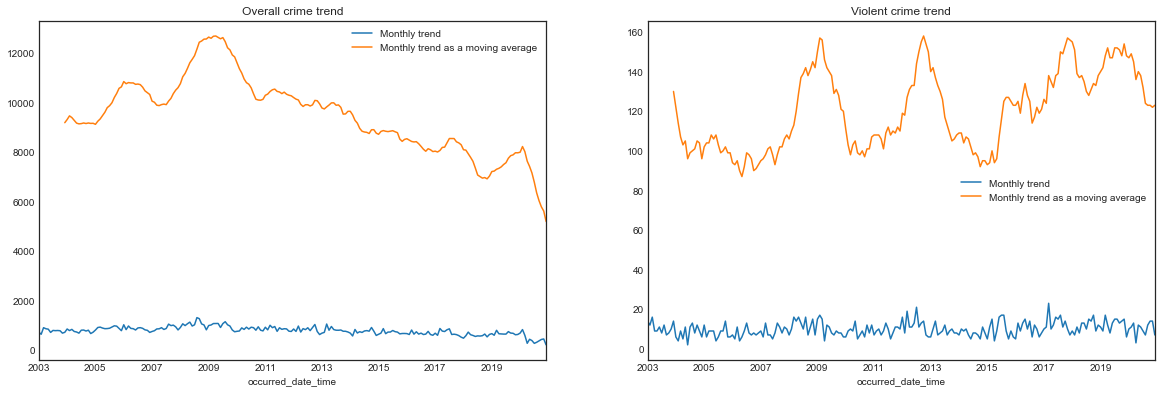

In [5]:
# Top 25 crime types
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    figsize=(8, 8), title="Top 25 crime types (2003-Present)"
)
plt.show()

fig, axs = plt.subplots(ncols=2, figsize=(20, 6.25))
df.resample("M").size().plot(ax=axs[0])
df.resample("M").size().rolling(12).sum().plot(title="Overall crime trend", ax=axs[0])
axs[0].legend(["Monthly trend", "Monthly trend as a moving average"])
df_viol.resample("M").size().plot(ax=axs[1])
df_viol.resample("M").size().rolling(12).sum().plot(
    title="Violent crime trend", ax=axs[1]
)
axs[1].legend(["Monthly trend", "Monthly trend as a moving average"])
plt.show()

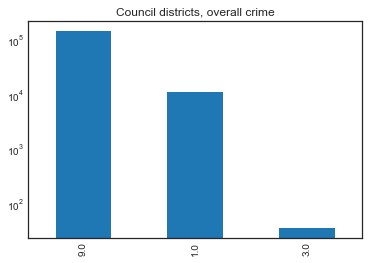

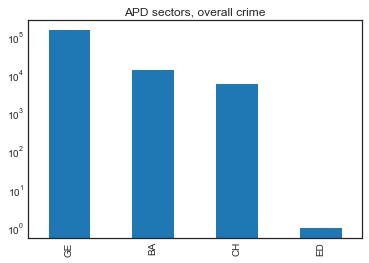

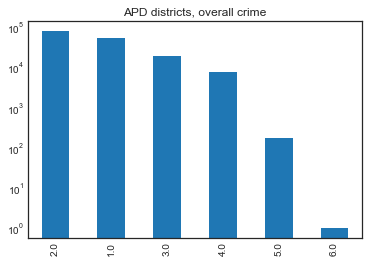

In [6]:
# Showing overall crime rates by council districts, APD districts, and sectors
df.council_district.value_counts().plot.bar(
    title="Council districts, overall crime", logy=True
)
plt.show()

df.apd_sector.value_counts().plot.bar(title="APD sectors, overall crime", logy=True)
plt.show()

df.apd_district.value_counts().plot.bar(title="APD districts, overall crime", logy=True)
plt.show()

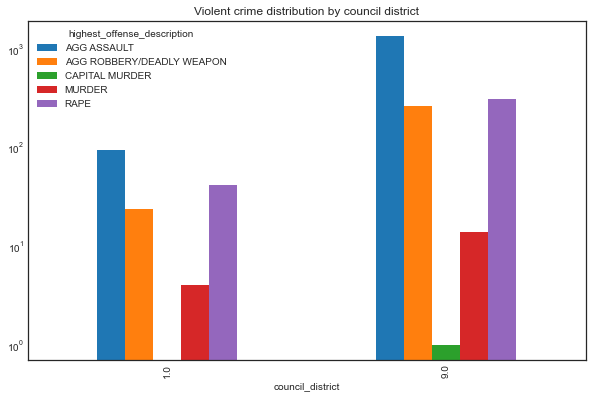

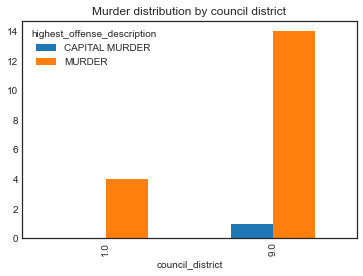

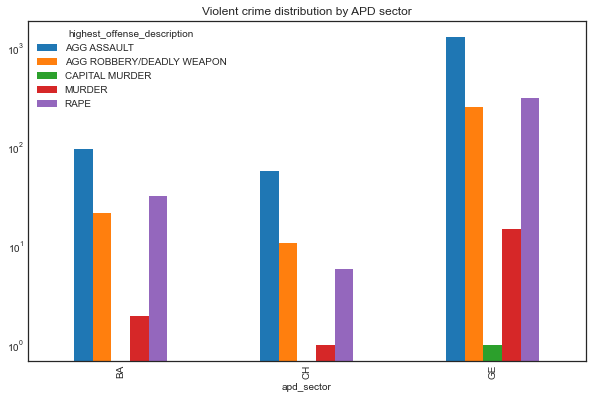

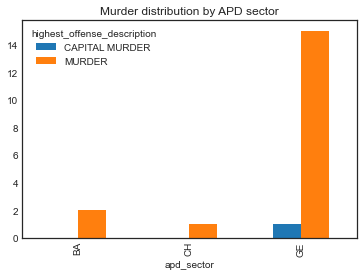

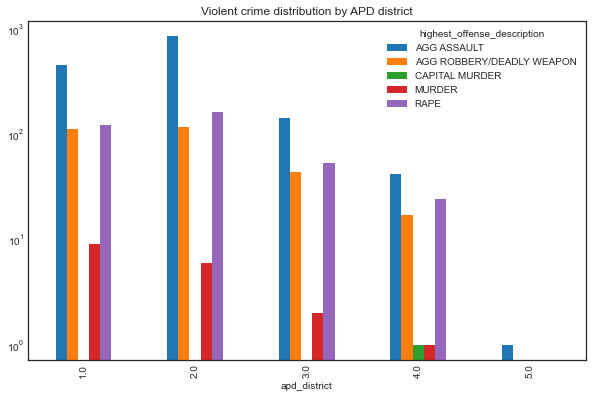

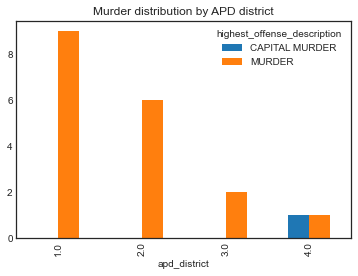

In [7]:
# Showing violent crime and murder rates by council districts, APD districts, and sectors
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25),
    logy=True,
    title="Violent crime distribution by council district",
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25), logy=True, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25), logy=True, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD district"
)
plt.show()

highest_offense_description                     AGG ASSAULT  \
location_type                                                 
ABANDONED/CONDEMNED STRUCTURE                             3   
AMUSEMENT PARK                                            0   
BANKS / SAVINGS & LOAN                                    1   
BAR / NIGHT CLUB                                        236   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                      6   
COMMERCIAL / OFFICE BUILDING                             17   
COMMUNITY CENTER                                          2   
CONSTRUCTION SITE                                         4   
CONVENIENCE STORE                                        12   
DRUG STORE / DR. OFFICE / HOSPITAL                       10   
FIELD / WOODS                                             6   
GAS / SERVICE STATIONS                                   13   
GOVERNMENT / PUBLIC BUILDING                             30   
HOTEL / MOTEL / ETC.                                     14   
LAKE / WATERWAY                                           1   
OTHER / UNKNOWN                                          32   
PARK / PLAYGROUND                                        17   
PARKING LOTS / GARAGE                                   118   
RESIDENCE / HOME                                         39   
RESTAURANTS                                              18   
SCHOOLS / COLLEGES                                        1   
SHELTER-MISSION / HOMELESS                               14   
STREETS / HWY / ROAD / ALLEY                            892   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)           10   

highest_offense_description                     AGG ROBBERY/DEADLY WEAPON  \
location_type                                                               
ABANDONED/CONDEMNED STRUCTURE                                           2   
AMUSEMENT PARK                                                          1   
BANKS / SAVINGS & LOAN                                                  5   
BAR / NIGHT CLUB                                                        5   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                                    1   
COMMERCIAL / OFFICE BUILDING                                            7   
COMMUNITY CENTER                                                        0   
CONSTRUCTION SITE                                                       1   
CONVENIENCE STORE                                                       7   
DRUG STORE / DR. OFFICE / HOSPITAL                                      1   
FIELD / WOODS                                                           2   
GAS / SERVICE STATIONS                                                  2   
GOVERNMENT / PUBLIC BUILDING                                            3   
HOTEL / MOTEL / ETC.                                                    1   
LAKE / WATERWAY                                                         0   
OTHER / UNKNOWN                                                         5   
PARK / PLAYGROUND                                                       7   
PARKING LOTS / GARAGE                                                  44   
RESIDENCE / HOME                                                        4   
RESTAURANTS                                                             1   
SCHOOLS / COLLEGES                                                      0   
SHELTER-MISSION / HOMELESS                                              0   
STREETS / HWY / ROAD / ALLEY                                          193   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                          0   

highest_offense_description                     CAPITAL MURDER  MURDER  RAPE  
location_type                                                                 
ABANDONED/CONDEMNED STRUCTURE                                0       1     1  
AMUSEMENT PARK                                               0       0     0  
BANKS / SAVINGS & LOAN                    

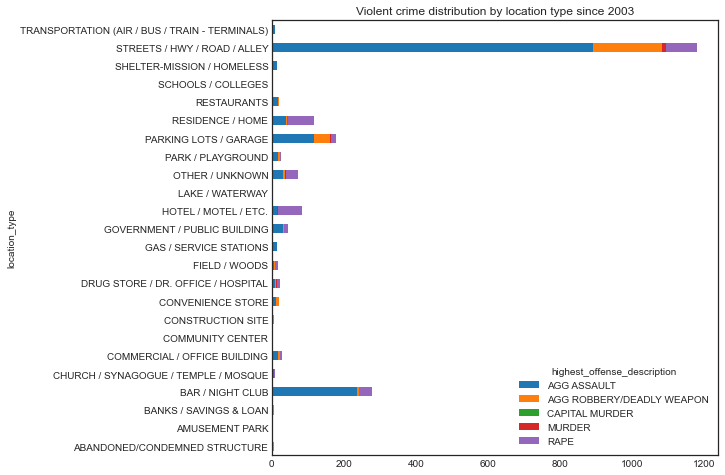

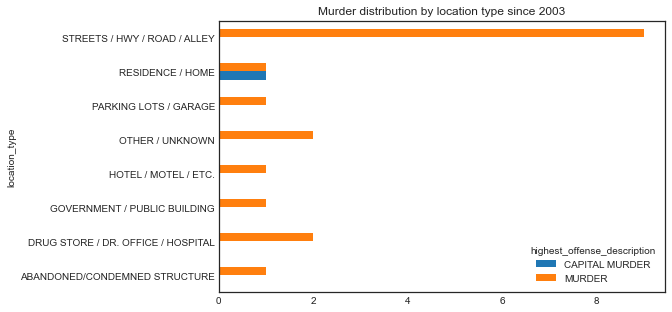

In [8]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)

mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

viol_loc.plot.barh(
    figsize=(8, 8),
    title="Violent crime distribution by location type since 2003",
    stacked=True,
)
plt.show()

mur_loc.plot.barh(
    figsize=(8, 5), title="Murder distribution by location type since 2003"
)
plt.show()

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


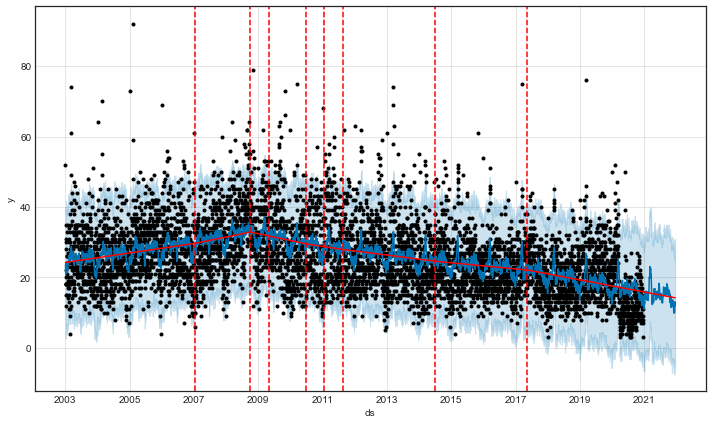

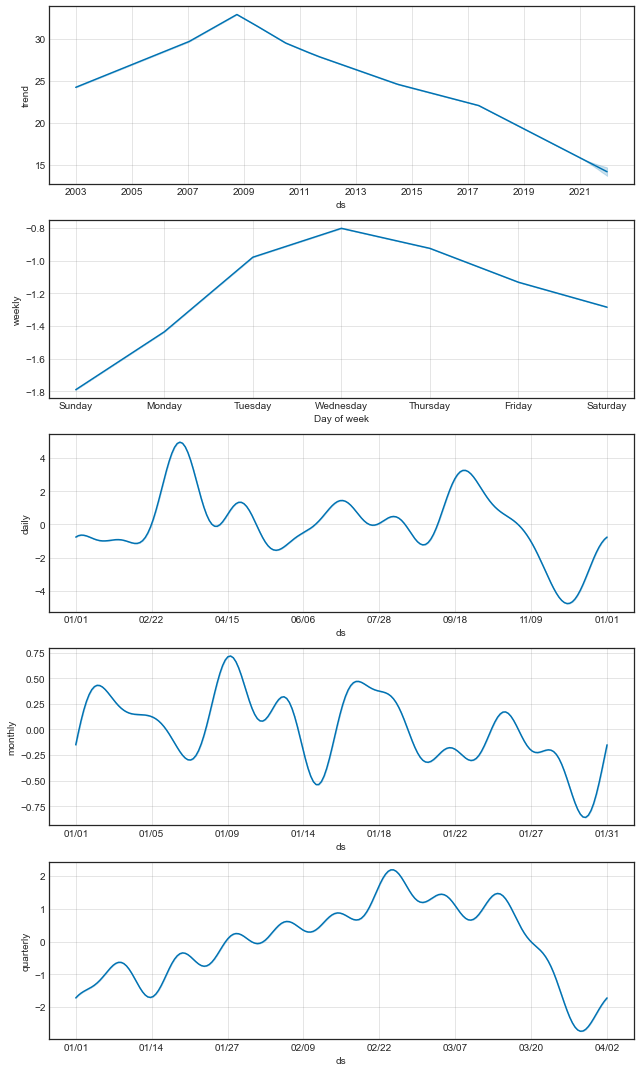

In [9]:
# forecasting for overall crime
df_fbprophet = df

df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")

forecast = m.predict(future)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

fig2 = m.plot_components(forecast)
fig2_1 = plot_plotly(m, forecast)
fig2_1

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


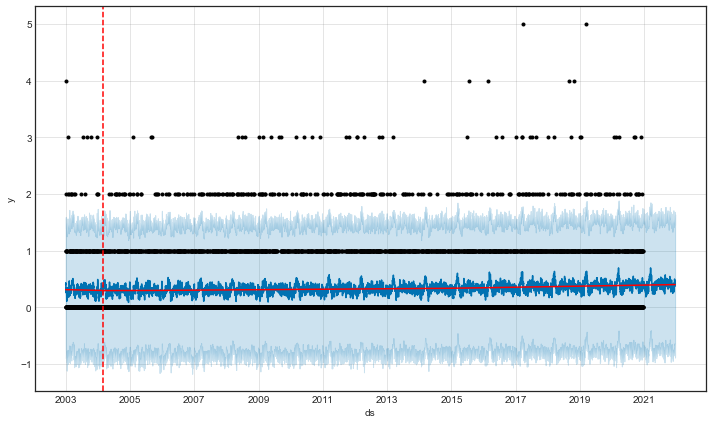

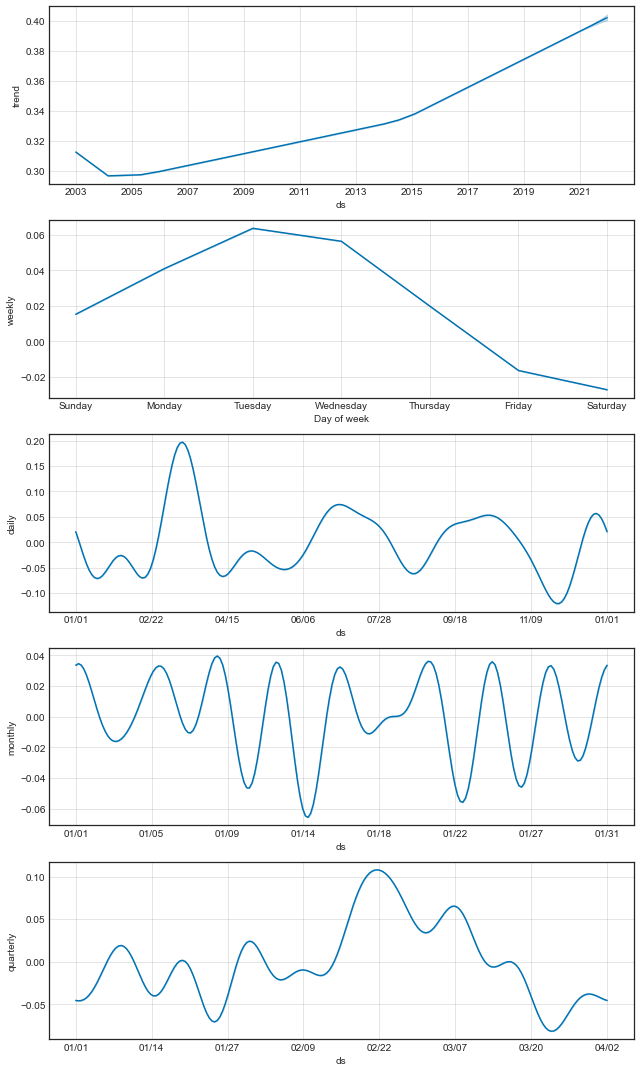

In [10]:
# forecasting for violent crime
df_viol_fbprophet = df_viol

df_viol_n = df_viol_fbprophet.resample("D").size().reset_index()
df_viol_n.columns = ["date", "daily_crime_count"]
df_viol_n_final = df_viol_n.rename(columns={"date": "ds", "daily_crime_count": "y"})

n = Prophet(interval_width=0.95, yearly_seasonality=False)
n.add_seasonality(name="monthly", period=30.5, fourier_order=10)
n.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
n.add_seasonality(name="weekly", period=52, fourier_order=10)
n.add_seasonality(name="daily", period=365, fourier_order=10)
n.fit(df_viol_n_final)

future = n.make_future_dataframe(periods=365, freq="D")
forecast = n.predict(future)

fig = n.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), n, forecast)

fig3 = n.plot_components(forecast)
fig3_1 = plot_plotly(n, forecast)
fig3_1